In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as si
import os
import scipy.stats as stats

cwd = os.getcwd()
plots = os.path.join(cwd,'plots')


def transform_rotation(theta, gamma):
    tan_gamma = np.tan(gamma/180*np.pi)
    true_tan_alhpa = tan_gamma * np.cos(theta/180*np.pi)
    true_tan_beta = - tan_gamma * np.sin(theta/180*np.pi)
    return true_tan_alhpa, true_tan_beta

def stepper_to_angle(stepper):
    return stepper/16*0.9

data = {}
angles = [45, 90, 135, 180]
for angle in angles:
    for run in [1, 2, 3]:
        f = os.path.join(cwd, 'data', f'{angle}_{run}_70max')
        data[(angle, run)] = np.loadtxt(f, skiprows=1, delimiter=',',).T

### Check zero position angles

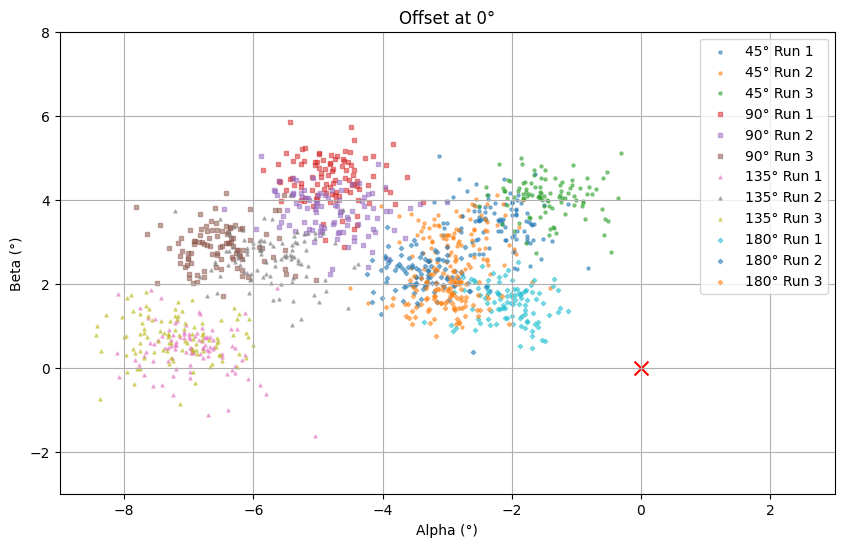

In [30]:
plt.figure(figsize=(10, 6))
zeroing = {}
for key in data:
    angle, run = key
    mask = data[key][1] == 0
    avg_alpha = np.mean(data[key][9][mask])
    avg_beta = np.mean(data[key][10][mask])
    zeroing[key] = (avg_alpha, avg_beta)
    symbol = 'o' if angle == 45 else 's' if angle == 90 else '^' if angle == 135 else 'D'
    plt.scatter(data[key][9][mask], data[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol)
    # plt.scatter(data[key][9][mask], data[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol)
plt.xlabel('Alpha (°)')
plt.ylabel('Beta (°)')
plt.title('Offset at 0°')
plt.legend()
plt.grid()
plt.xlim(-9, 3)
plt.ylim(-3, 8)
plt.scatter(0, 0, color='red', marker='x', s=100, label='Center Position (0°, 0°)')
plt.savefig(os.path.join(plots, 'offset_at_0.png'), dpi=300)
plt.show()


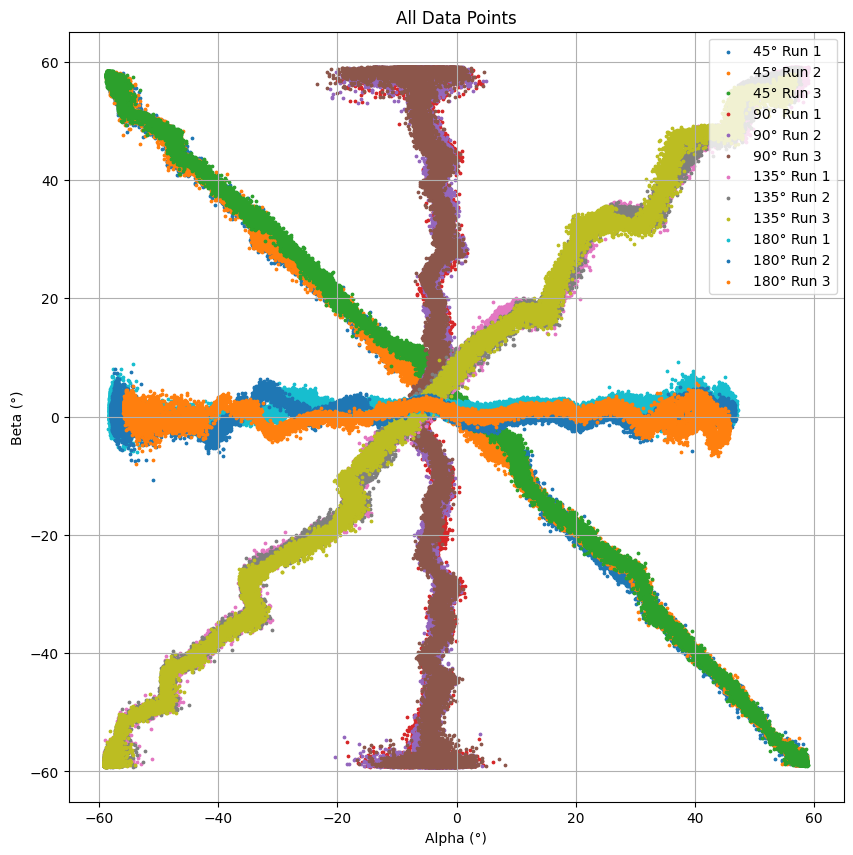

In [31]:
plt.figure(figsize=(10, 10))
for key in data:
    angle, run = key
    d = data[key]
    
    plt.scatter(d[9], d[10], label=f'{angle}° Run {run}', alpha=1, s=3)
plt.xlabel('Alpha (°)')
plt.ylabel('Beta (°)')
plt.title('All Data Points')
plt.legend(loc='upper right')
plt.grid()
plt.savefig(os.path.join(plots, 'all_data_points.png'), dpi=300)
plt.show()

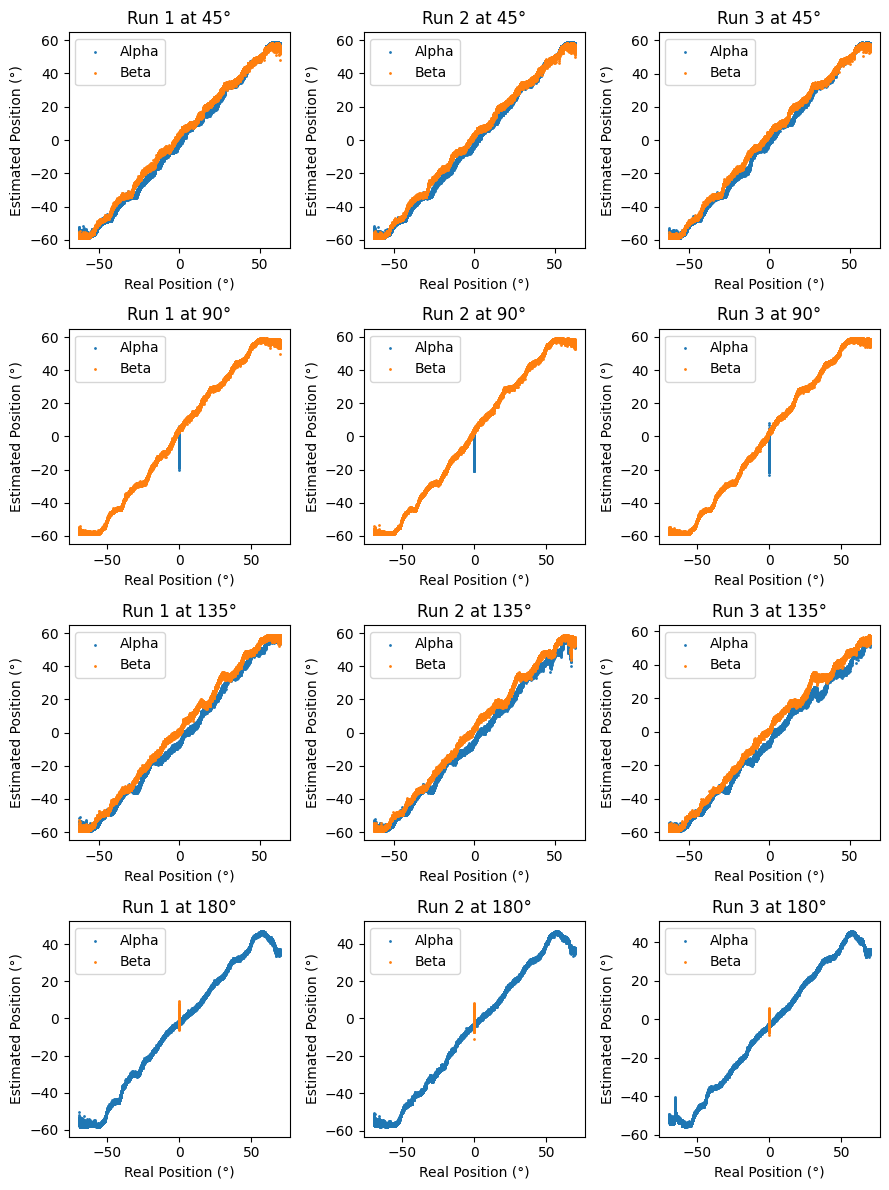

In [32]:
plt.figure(figsize=(9, 12))
fig = 1
for key in data:
    theta, run = key
    plt.subplot(4, 3, fig)
    d = data[key]
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    plt.scatter(np.arctan(true_tan_alpha)*180/np.pi, d[9], s = 1, label='Alpha')
    plt.scatter(np.arctan(true_tan_beta)*180/np.pi, d[10], s = 1, label='Beta')
    plt.legend(loc='upper left')
    plt.xlabel('Real Position (°)')
    plt.ylabel('Estimated Position (°)')
    plt.title(f'Run {run} at {theta}°')
    fig += 1
plt.tight_layout()
plt.savefig(os.path.join(plots, 'run_plots.png'), dpi=300)
plt.show()
    

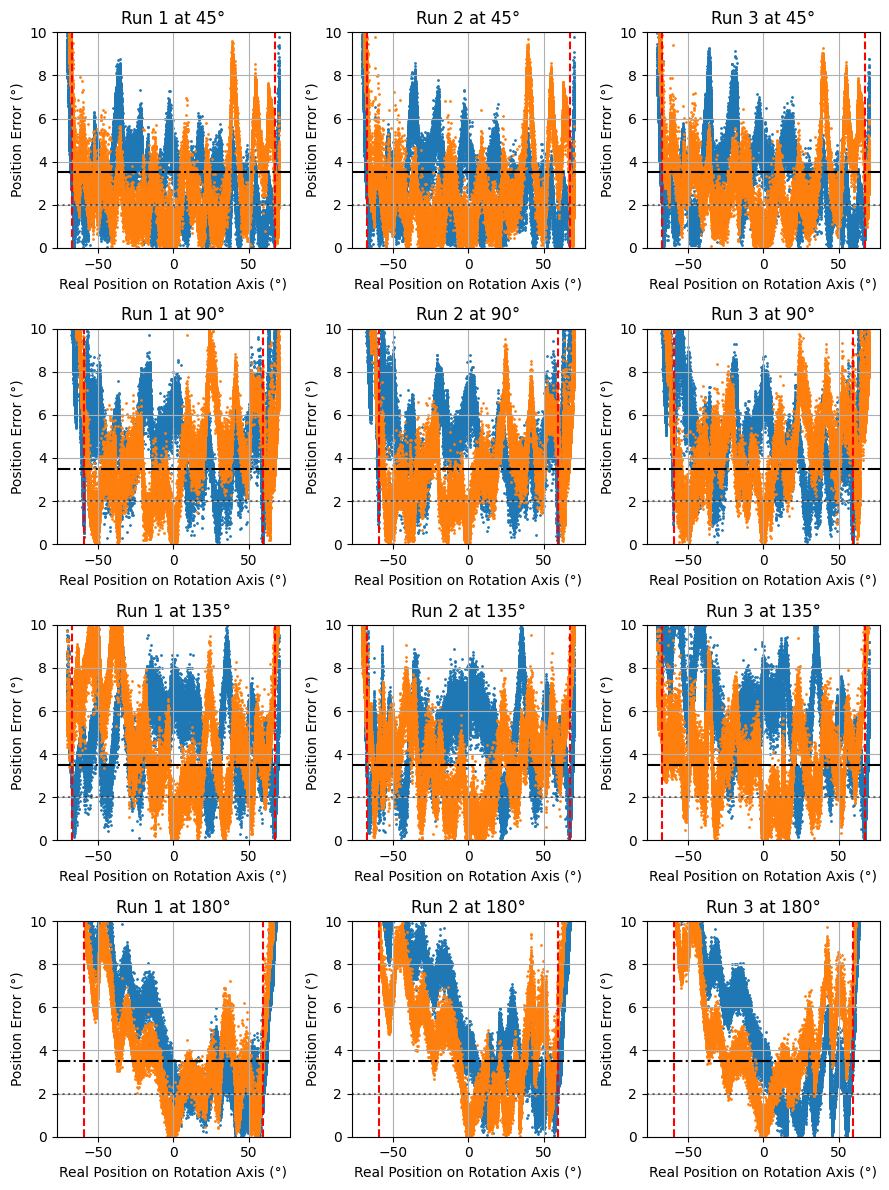

In [37]:
plt.figure(figsize=(9, 12))
fig = 1
for key in data:
    theta, run = key
    plt.subplot(4, 3, fig)
    d = data[key]
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    zeroing_alpha, zeroing_beta = zeroing[key]
    position_error = np.sqrt((d[9] - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - np.arctan(true_tan_beta)*180/np.pi)**2)
    zeroed_position_error = np.sqrt((d[9] - zeroing_alpha - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - zeroing_beta - np.arctan(true_tan_beta)*180/np.pi)**2)
    plt.scatter(stepper_to_angle(d[1]), position_error, s = 1, label='Position Error')
    plt.scatter(stepper_to_angle(d[1]), zeroed_position_error, s = 1, label='Zeroed Error')
    plt.xlabel('Real Position on Rotation Axis (°)')
    plt.ylabel('Position Error (°)')
    plt.title(f'Run {run} at {theta}°')
    
    
    plt.axhline(2, color='black', linestyle=':', alpha=0.5, label='2° error')
    plt.axhline(3.5, color='black', linestyle='-.', label='3.5° error')
    lim = 59.2 if theta % 90 == 0 else 67.1
    plt.axvline(lim, color='red', linestyle='--', label=f'{lim}° limit')
    plt.axvline(-lim, color='red', linestyle='--')
    # plt.legend(loc='upper right')
    plt.grid()
    plt.ylim(0, 10)
    
    fig += 1
plt.tight_layout()
plt.savefig(os.path.join(plots, 'run_plots.png'), dpi=300)
plt.show()
    